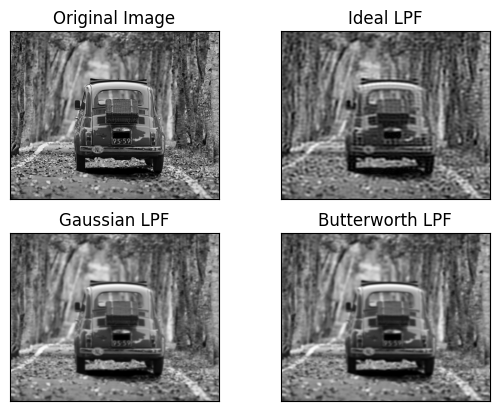

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def ideal_lpf(image, d):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a mask with ideal low pass filter characteristics
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= d:
                mask[i, j] = 1

    # Apply the mask in the frequency domain
    fshift = np.fft.fftshift(np.fft.fft2(image))
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

def gaussian_lpf(image, d):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a Gaussian filter in the frequency domain
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            mask[i, j] = np.exp(-((i - crow) ** 2 + (j - ccol) ** 2) / (2 * d ** 2))

    # Apply the Gaussian filter in the frequency domain
    fshift = np.fft.fftshift(np.fft.fft2(image))
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

def butterworth_lpf(image, d, n):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a Butterworth low pass filter in the frequency domain
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (dist / d) ** (2 * n))

    # Apply the Butterworth filter in the frequency domain
    fshift = np.fft.fftshift(np.fft.fft2(image))
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

# Load the input image
image = cv2.imread(r'C:\Users\minha\Downloads\car3.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Ideal LPF with a cutoff frequency of 50
ideal_result = ideal_lpf(image, 50)

# Perform Gaussian LPF with a standard deviation of 50
gaussian_result = gaussian_lpf(image, 50)

# Perform Butterworth LPF with a cutoff frequency of 50 and order 2
butterworth_result = butterworth_lpf(image, 50, 2)

# Display the original and filtered images
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(ideal_result, cmap='gray')
plt.title('Ideal LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(gaussian_result, cmap='gray')
plt.title('Gaussian LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(butterworth_result, cmap='gray')
plt.title('Butterworth LPF'), plt.xticks([]), plt.yticks([])

plt.show()


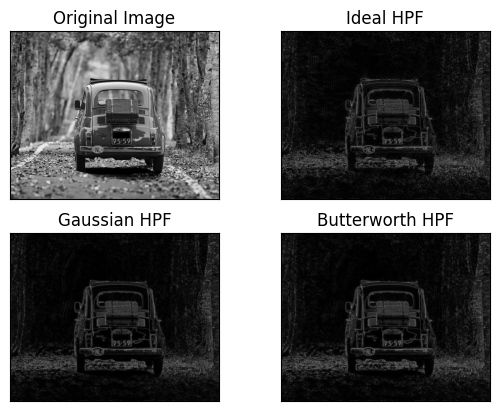

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def ideal_hpf(image, d):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a mask with ideal high pass filter characteristics
    mask = np.ones((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) <= d:
                mask[i, j] = 0

    # Apply the mask in the frequency domain
    fshift = np.fft.fftshift(np.fft.fft2(image))
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

def gaussian_hpf(image, d):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a Gaussian high pass filter in the frequency domain
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            mask[i, j] = 1 - np.exp(-((i - crow) ** 2 + (j - ccol) ** 2) / (2 * d ** 2))

    # Apply the Gaussian filter in the frequency domain
    fshift = np.fft.fftshift(np.fft.fft2(image))
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

def butterworth_hpf(image, d, n):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a Butterworth high pass filter in the frequency domain
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 - 1 / (1 + (dist / d) ** (2 * n))

    # Apply the Butterworth filter in the frequency domain
    fshift = np.fft.fftshift(np.fft.fft2(image))
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back

# Load the input image
image = cv2.imread(r'C:\Users\minha\Downloads\car3.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Ideal HPF with a cutoff frequency of 50
ideal_result = ideal_hpf(image, 50)

# Perform Gaussian HPF with a standard deviation of 50
gaussian_result = gaussian_hpf(image, 50)

# Perform Butterworth HPF with a cutoff frequency of 50 and order 2
butterworth_result = butterworth_hpf(image, 50, 2)

# Display the original and filtered images
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(ideal_result, cmap='gray')
plt.title('Ideal HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(gaussian_result, cmap='gray')
plt.title('Gaussian HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(butterworth_result, cmap='gray')
plt.title('Butterworth HPF'), plt.xticks([]), plt.yticks([])

plt.show()


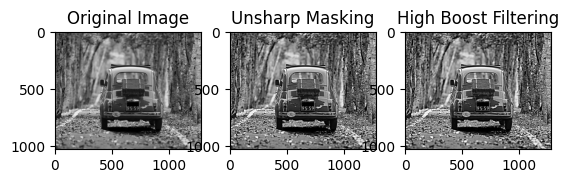

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def unsharp_masking(img, alpha, radius):
    blurred = cv2.GaussianBlur(img, (0, 0), radius)
    sharpened = cv2.addWeighted(img, 1.0 + alpha, blurred, -alpha, 0)
    return sharpened

def high_boost_filtering(img, alpha, radius):
    blurred = cv2.GaussianBlur(img, (0, 0), radius)
    mask = cv2.addWeighted(img, 1.0 + alpha, blurred, -alpha, 0)
    return mask

# Read the image
img = cv2.imread(r'C:\Users\minha\Downloads\car3.jpg', cv2.IMREAD_GRAYSCALE)

# Perform unsharp masking
alpha = 1.5  # Adjust as needed
radius = 5   # Adjust as needed
unsharp_masked_img = unsharp_masking(img, alpha, radius)

# Perform high boost filtering
alpha = 2.0  # Adjust as needed
radius = 5   # Adjust as needed
high_boost_filtered_img = high_boost_filtering(img, alpha, radius)

# Display the results
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(unsharp_masked_img, cmap='gray'), plt.title('Unsharp Masking')
plt.subplot(133), plt.imshow(high_boost_filtered_img, cmap='gray'), plt.title('High Boost Filtering')
plt.show()


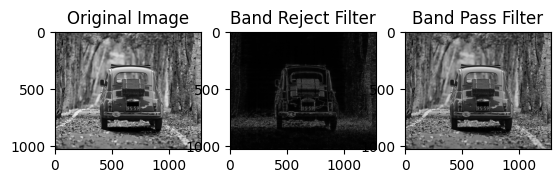

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def band_reject_filter(img, low_cutoff, high_cutoff):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    
    # Create mask for band reject filter
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-low_cutoff:crow+low_cutoff, ccol-low_cutoff:ccol+low_cutoff] = 0
    mask[crow-high_cutoff:crow+high_cutoff, ccol-high_cutoff:ccol+high_cutoff] = 0

    # Apply filter
    fshift = fshift * mask
    
    # Inverse shift
    f_ishift = np.fft.ifftshift(fshift)
    
    # Inverse Fourier transform
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

def band_pass_filter(img, low_cutoff, high_cutoff):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    
    # Create mask for band pass filter
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-low_cutoff:crow+low_cutoff, ccol-low_cutoff:ccol+low_cutoff] = 1
    mask[crow-high_cutoff:crow+high_cutoff, ccol-high_cutoff:ccol+high_cutoff] = 1

    # Apply filter
    fshift = fshift * mask
    
    # Inverse shift
    f_ishift = np.fft.ifftshift(fshift)
    
    # Inverse Fourier transform
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

# Read the image
img = cv2.imread(r'C:\Users\minha\Downloads\car3.jpg', cv2.IMREAD_GRAYSCALE)

# Perform band reject filtering
low_cutoff = 50
high_cutoff = 100
band_reject_filtered_img = band_reject_filter(img, low_cutoff, high_cutoff)

# Perform band pass filtering
low_cutoff = 50
high_cutoff = 100
band_pass_filtered_img = band_pass_filter(img, low_cutoff, high_cutoff)

# Display the results
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(band_reject_filtered_img, cmap='gray'), plt.title('Band Reject Filter')
plt.subplot(133), plt.imshow(band_pass_filtered_img, cmap='gray'), plt.title('Band Pass Filter')
plt.show()


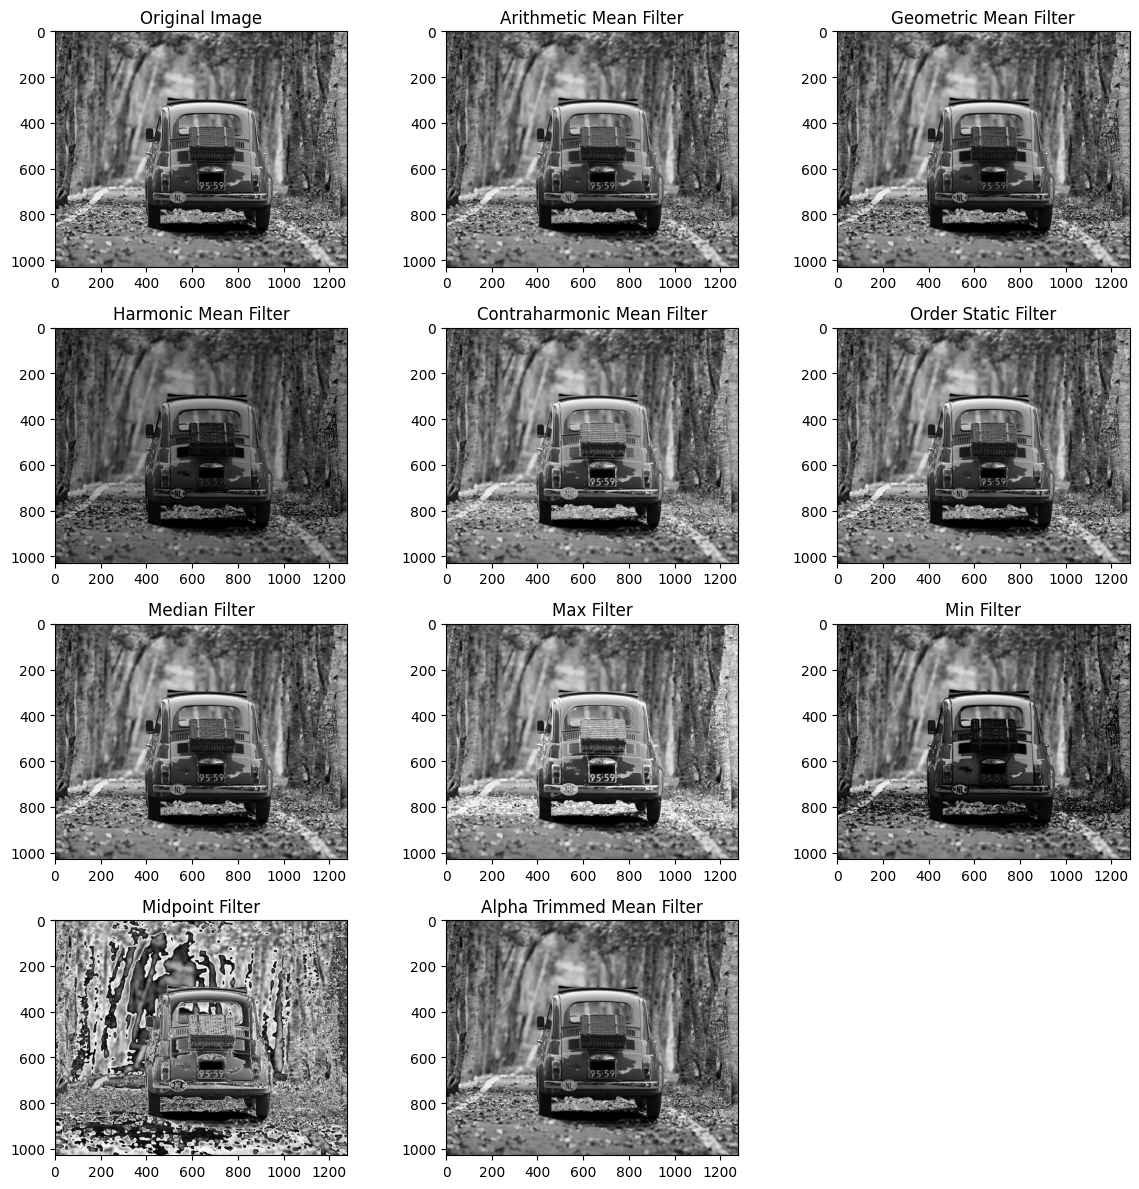

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from scipy import signal  # Added this import statement

def arithmetic_mean_filter(img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    return cv2.filter2D(img, -1, kernel)

def geometric_mean_filter(img, kernel_size):
    img_log = np.log(img.astype(np.float32) + 1)  # Add 1 to avoid log(0)
    filtered_log = signal.fftconvolve(img_log, np.ones((kernel_size, kernel_size)), mode='same') / (kernel_size ** 2)
    return np.exp(filtered_log) - 1


def harmonic_mean_filter(img, kernel_size):
    return kernel_size ** 2 / signal.fftconvolve(1 / (img + 0.00001), np.ones((kernel_size, kernel_size)), mode='same')

def contraharmonic_mean_filter(img, kernel_size, Q):
    numerator = signal.fftconvolve(img ** (Q + 1), np.ones((kernel_size, kernel_size)), mode='same')
    denominator = signal.fftconvolve(img ** Q, np.ones((kernel_size, kernel_size)), mode='same')
    return numerator / (denominator + 0.00001)

def order_static_filter(img, kernel_size, rank):
    return median_filter(img, kernel_size)

def median_filter(img, kernel_size):
    return cv2.medianBlur(img, kernel_size)

def max_filter(img, kernel_size):
    return cv2.dilate(img, np.ones((kernel_size, kernel_size), np.uint8))

def min_filter(img, kernel_size):
    return cv2.erode(img, np.ones((kernel_size, kernel_size), np.uint8))

def midpoint_filter(img, kernel_size):
    min_filtered = min_filter(img, kernel_size)
    max_filtered = max_filter(img, kernel_size)
    return (min_filtered + max_filtered) / 2

def alpha_trimmed_mean_filter(img, kernel_size, d):
    filtered_img = cv2.copyMakeBorder(img, d, d, d, d, cv2.BORDER_CONSTANT, value=0)
    filtered = np.zeros_like(img, dtype=np.float32)
    for i in range(d, filtered_img.shape[0] - d):
        for j in range(d, filtered_img.shape[1] - d):
            patch = filtered_img[i - d:i + d + 1, j - d:j + d + 1]
            trimmed_patch = np.sort(patch.flatten())[d:-d]
            filtered[i - d, j - d] = np.mean(trimmed_patch)
    return filtered.astype(np.uint8)

# Read the image
img = cv2.imread(r'C:\Users\minha\Downloads\car3.jpg', cv2.IMREAD_GRAYSCALE)

# Denoising operations
arithmetic_mean_filtered = arithmetic_mean_filter(img, 3)
geometric_mean_filtered = geometric_mean_filter(img, 3)
harmonic_mean_filtered = harmonic_mean_filter(img, 3)
contraharmonic_mean_filtered = contraharmonic_mean_filter(img, 3, 1.5)
order_static_filtered = order_static_filter(img, 3, 5)
median_filtered = median_filter(img, 3)
max_filtered = max_filter(img, 3)
min_filtered = min_filter(img, 3)
midpoint_filtered = midpoint_filter(img, 3)
alpha_trimmed_mean_filtered = alpha_trimmed_mean_filter(img, 3, 1)

# Displaying results as plots
plt.figure(figsize=(12, 12))

plt.subplot(4, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(4, 3, 2), plt.imshow(arithmetic_mean_filtered, cmap='gray'), plt.title('Arithmetic Mean Filter')
plt.subplot(4, 3, 3), plt.imshow(geometric_mean_filtered, cmap='gray'), plt.title('Geometric Mean Filter')
plt.subplot(4, 3, 4), plt.imshow(harmonic_mean_filtered, cmap='gray'), plt.title('Harmonic Mean Filter')
plt.subplot(4, 3, 5), plt.imshow(contraharmonic_mean_filtered, cmap='gray'), plt.title('Contraharmonic Mean Filter')
plt.subplot(4, 3, 6), plt.imshow(order_static_filtered, cmap='gray'), plt.title('Order Static Filter')
plt.subplot(4, 3, 7), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filter')
plt.subplot(4, 3, 8), plt.imshow(max_filtered, cmap='gray'), plt.title('Max Filter')
plt.subplot(4, 3, 9), plt.imshow(min_filtered, cmap='gray'), plt.title('Min Filter')
plt.subplot(4, 3, 10), plt.imshow(midpoint_filtered, cmap='gray'), plt.title('Midpoint Filter')
plt.subplot(4, 3, 11), plt.imshow(alpha_trimmed_mean_filtered, cmap='gray'), plt.title('Alpha Trimmed Mean Filter')

plt.tight_layout()
plt.show()


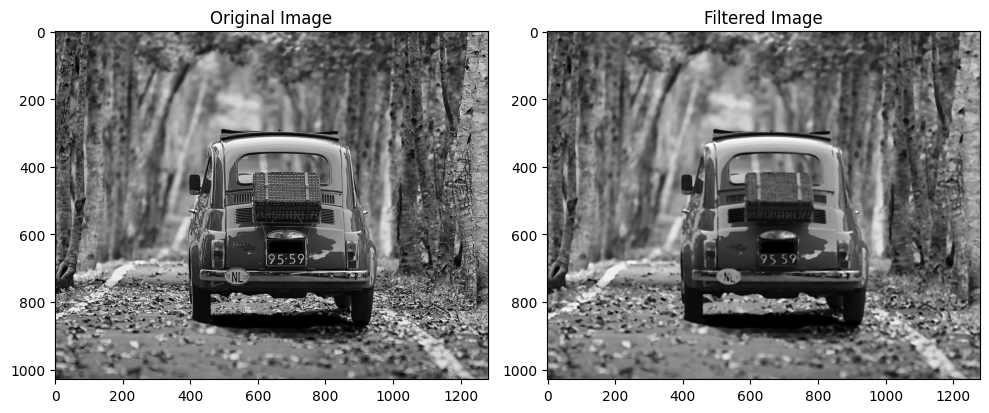

In [21]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_median_filter(img, max_filter_size):
    filtered_image = cv2.medianBlur(img, max_filter_size)
    return filtered_image

# Load the input image
image = cv2.imread(r'C:\Users\minha\Downloads\car3.jpg', cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Apply adaptive median filter with a maximum filter size of 7x7
    filtered_image = adaptive_median_filter(image, 7)

    # Display original and filtered images as subplots
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Failed to load the image.")

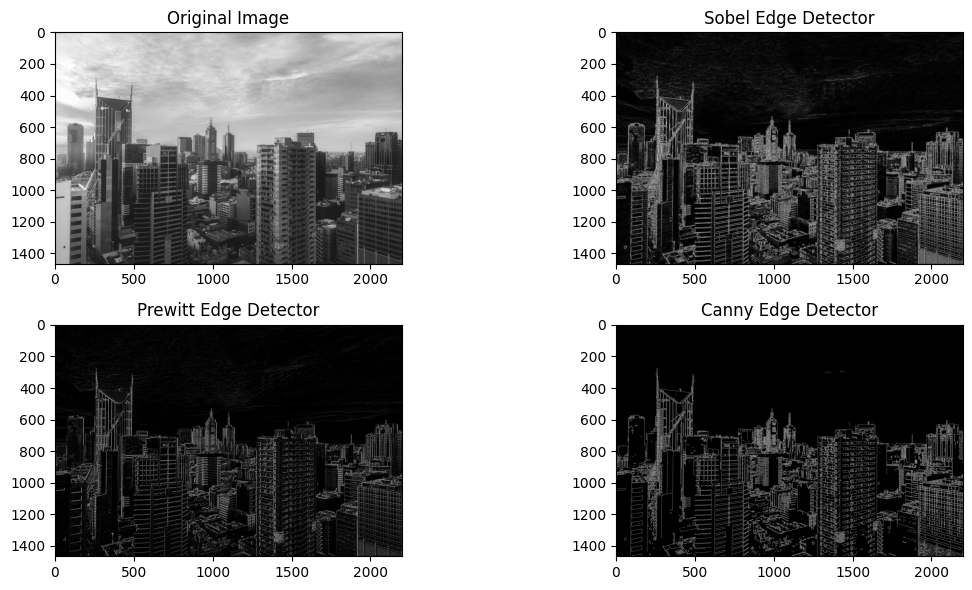

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r'C:\Users\minha\Downloads\building.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detector
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)

# Prewitt Edge Detector
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(img, -1, prewitt_kernel_x).astype(np.float32)
prewitt_y = cv2.filter2D(img, -1, prewitt_kernel_y).astype(np.float32)
prewitt_edge = np.sqrt(prewitt_x ** 2 + prewitt_y ** 2).astype(np.uint8)

# Canny Edge Detector
canny_edge = cv2.Canny(img, 100, 200)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detector')

plt.subplot(2, 2, 3)
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detector')

plt.subplot(2, 2, 4)
plt.imshow(canny_edge, cmap='gray')
plt.title('Canny Edge Detector')

plt.tight_layout()
plt.show()


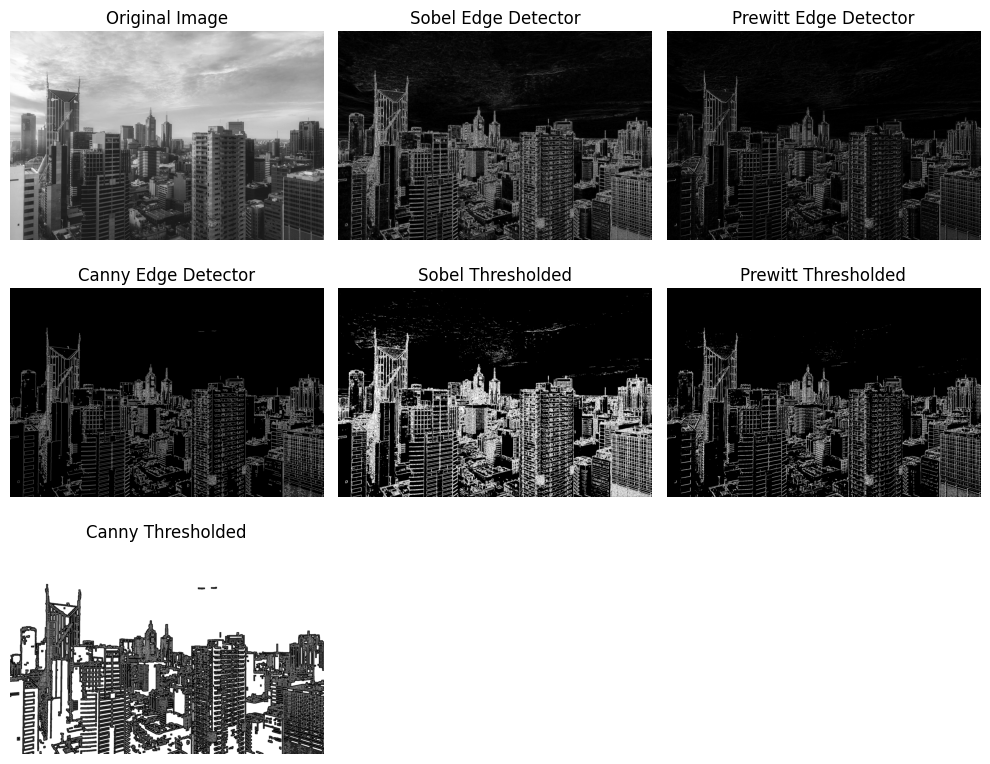

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r'C:\Users\minha\Downloads\building.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detector
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)

# Prewitt Edge Detector
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(img, -1, prewitt_kernel_x).astype(np.float32)
prewitt_y = cv2.filter2D(img, -1, prewitt_kernel_y).astype(np.float32)
prewitt_edge = np.sqrt(prewitt_x ** 2 + prewitt_y ** 2).astype(np.uint8)

# Canny Edge Detector
canny_edge = cv2.Canny(img, 100, 200)

# Thresholding to obtain segmented images
_, sobel_thresholded = cv2.threshold(sobel_edge, 50, 255, cv2.THRESH_BINARY)
_, prewitt_thresholded = cv2.threshold(prewitt_edge, 50, 255, cv2.THRESH_BINARY)
canny_thresholded = cv2.adaptiveThreshold(canny_edge, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Plotting
plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detector')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detector')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(canny_edge, cmap='gray')
plt.title('Canny Edge Detector')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(sobel_thresholded, cmap='gray')
plt.title('Sobel Thresholded')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(prewitt_thresholded, cmap='gray')
plt.title('Prewitt Thresholded')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(canny_thresholded, cmap='gray')
plt.title('Canny Thresholded')
plt.axis('off')

plt.tight_layout()
plt.show()


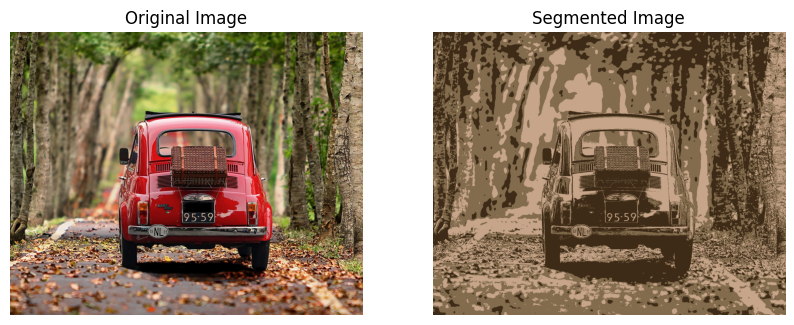

In [24]:
import matplotlib.pyplot as plt

# Read the image
img = plt.imread(r'C:\Users\minha\Downloads\car3.jpg')

# Reshape the image into a 2D array of pixels
pixels = img.reshape((-1, 3))

# Convert to float type
pixels = pixels.astype(np.float32)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Convert all pixels to the color of the centroids
segmented_img = centers[labels]

# Reshape back to the original image shape
segmented_img = segmented_img.reshape(img.shape)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title('Segmented Image')
plt.axis('off')

plt.show()
